# Evil Geniuses Assesment for Data Analytics
Name: Sharayu Thosar

Email: thosar.sh@northeastern.edu

Contact: 602-849-3746


**Link for Insights:** https://sites.google.com/view/data-analytics-assessment/home

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Reading the data
social_data = pd.read_excel("social_data.xlsx")
social_data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [ ]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   int64         
 5   Total Engagements  3479 non-null   int64         
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 190.4+ KB


In [ ]:
social_data.describe()

,Total Impressions,Total Engagements
count,3479.000000,3479.000000
mean,10972.453579,947.390629
std,29577.108063,3468.628038
min,0.000000,0.000000
25%,167.000000,0.000000
50%,1884.000000,39.000000
75%,12467.000000,276.500000
max,753227.000000,95062.000000


Engagement Rate = (Total Engagements/ Total Impressions)*100

#### Pre-processing the data

1. Since total engagement is a subset of total impressions, it is not possible for the number of engagements to be greater than the number of impressions. However, the data has some values where engagement is greater than impression.
2. The records where both engagement and impressions are 0 can be excluded as we may eliminate potential outliers that may skew the overall analysis. These data points typically indicate that there was no activity or interaction, making them less meaningful for calculating engagement rates

In [ ]:
#To accurately caclulate the engagement rate, removing the rows where Total Engagement > Total Impressions
social_data = social_data[social_data['Total Engagements']<= social_data['Total Impressions']]
social_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3476 non-null   datetime64[ns]
 1   Account            3476 non-null   object        
 2   Account Type       3476 non-null   object        
 3   Campaign Name      3476 non-null   object        
 4   Total Impressions  3476 non-null   int64         
 5   Total Engagements  3476 non-null   int64         
 6   Media Type         3476 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 217.2+ KB


In [ ]:
social_data = social_data[(social_data['Total Engagements']!=0) | (social_data['Total Impressions']!=0)]

In [ ]:
#Calculating the Engagement rate for every point
social_data['Engagement Rate'] = (social_data['Total Engagements']/social_data['Total Impressions'])*100
social_data.describe()

,Total Impressions,Total Engagements,Engagement Rate
count,2732.000000,2732.000000,2732.000000
mean,13972.496340,1204.689605,5.347238
std,32743.781714,3874.055402,7.184530
min,1.000000,0.000000,0.000000
25%,1058.000000,16.000000,1.425093
50%,4371.000000,93.000000,3.080242
75%,16330.250000,461.500000,6.160553
max,753227.000000,95062.000000,100.000000


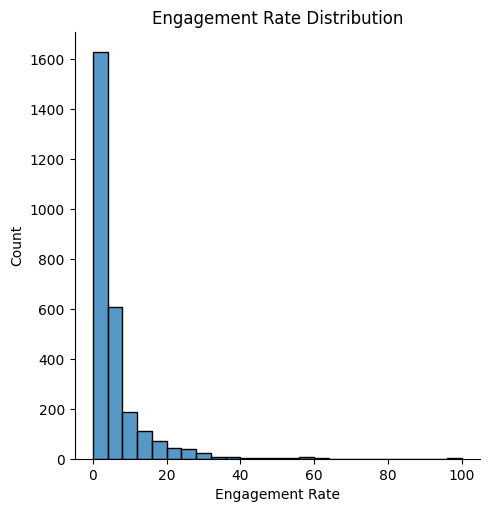

In [ ]:
sns.displot(social_data['Engagement Rate'], binwidth=4).set(title='Engagement Rate Distribution')


The Distribution is skewed to right, so mean won't be a good measure to calculate the typical engagement rate. Therefore, we can use median.

In [ ]:
#Typical Engagement rate will be average of the engagement rates
typical_engagement_rate = social_data['Engagement Rate'].mean()
typical_engagement_rate

5.3472378661118025

In [ ]:
typical_engagement_rate = social_data['Engagement Rate'].median()
typical_engagement_rate

3.080242023416295

In [ ]:
likelihood = 1 - stats.percentileofscore(social_data['Engagement Rate'], 15)/100.0
likelihood

0.08162518301610533

Typical Engagement Rate- 3.08


Liklihood to achieve 15% engagement rate - 0.081%

### Weekly Effect

To see the effect of day of week, let's create a new column called day of week and then calculate average engagement rate for each day. This will give us an insights on how engagement rate changes over the week. 


In [ ]:
#Creating a new column called week_day
social_data['Day Number'] = social_data['Published Date'].dt.weekday.astype(str)
social_data['Day'] = social_data['Published Date'].dt.day_name()

In [ ]:
#Creating a dataframe of weekly engagement data that aggregates mean values of Engagement Rate, Total Engagement and Total Impression
weekly_engagement = social_data.groupby(['Day', 'Day Number'], as_index=False)[['Total Engagements', 'Total Impressions']].sum()
weekly_engagement['Engagement Rate'] = round((weekly_engagement['Total Engagements']/weekly_engagement['Total Impressions'])*100, 2)
weekly_engagement['Count'] = social_data.groupby('Day')['Day'].count().reset_index(drop=True)
weekly_engagement.sort_values(by='Day Number', inplace=True)

In [ ]:
weekly_engagement

,Day,Day Number,Total Engagements,Total Impressions,Engagement Rate,Count
1,Monday,0,166279,2476029,6.72,186
5,Tuesday,1,731487,7197026,10.16,434
6,Wednesday,2,448516,5736454,7.82,429
4,Thursday,3,761100,8522399,8.93,567
0,Friday,4,641656,7481112,8.58,583
2,Saturday,5,146694,3028493,4.84,259
3,Sunday,6,395480,3731347,10.60,274


<Axes: xlabel='Day'>

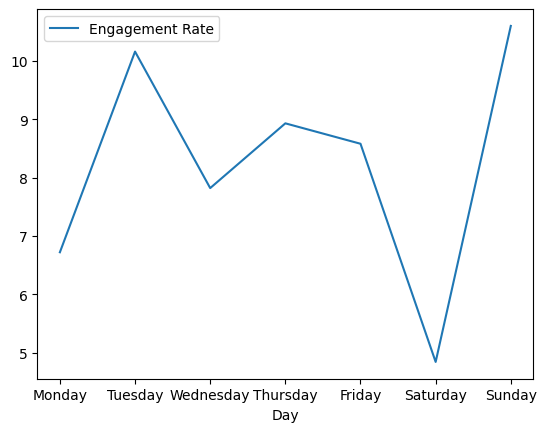

In [ ]:
#plot to visualize weekly distribution of engagement rates
weekly_engagement.plot.line(x='Day', y='Engagement Rate')

In [ ]:
#create a column for ratios to consider number of data points as well
engagement_ratio = weekly_engagement['Count'] / weekly_engagement['Engagement Rate'] 
weekly_engagement['Engagement Ratio'] = round(engagement_ratio, 2)
weekly_engagement

,Day,Day Number,Total Engagements,Total Impressions,Engagement Rate,Count,Engagement Ratio
1,Monday,0,166279,2476029,6.72,186,27.68
5,Tuesday,1,731487,7197026,10.16,434,42.72
6,Wednesday,2,448516,5736454,7.82,429,54.86
4,Thursday,3,761100,8522399,8.93,567,63.49
0,Friday,4,641656,7481112,8.58,583,67.95
2,Saturday,5,146694,3028493,4.84,259,53.51
3,Sunday,6,395480,3731347,10.60,274,25.85


<Axes: title={'center': 'Engagement Trend over the week'}, xlabel='Day'>

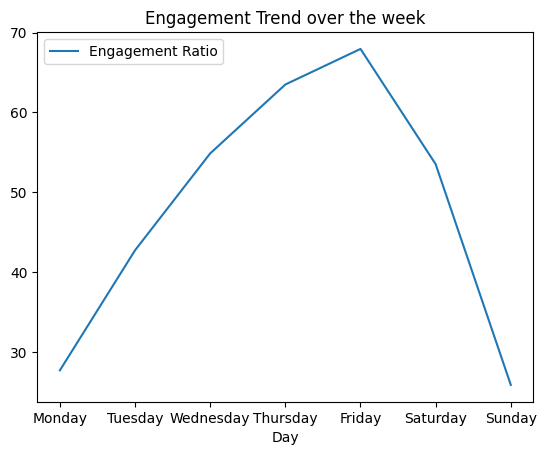

In [ ]:
#plot to visualize weekly distribution of engagement rates
weekly_engagement.plot.line(x='Day', y='Engagement Ratio', title=("Engagement Trend over the week"))

Now, we can see the actual trend of engagement that increases as the week starts, is maximum on Friday and then decreases. 

### Hourly Effect

In [ ]:
social_data['Hour of Day'] = social_data['Published Date'].dt.hour

In [ ]:
hourly_engagement = social_data.groupby(['Hour of Day'], as_index=False)[['Total Engagements','Total Impressions']].sum()
hourly_engagement['Count'] = social_data.groupby('Hour of Day')['Hour of Day'].count().reset_index(drop=True)
hourly_engagement['Engagement Rate'] = round((hourly_engagement['Total Engagements']/hourly_engagement['Total Impressions'])*100, 2)
hourly_engagement.sort_values(by='Hour of Day', inplace=True)
hourly_engagement

,Hour of Day,Total Engagements,Total Impressions,Count,Engagement Rate
0,2,274,32613,1,0.84
1,3,5114,66113,6,7.74
2,4,4135,46270,8,8.94
3,5,89914,342095,26,26.28
4,6,58477,724658,67,8.07
5,7,151929,1059382,101,14.34
6,8,198343,1901692,127,10.43
7,9,467383,5292903,304,8.83
8,10,276096,4218300,196,6.55
9,11,290577,4207938,273,6.91


In [ ]:
#create a column for ratios to consider number of data points as well
engagement_ratio = hourly_engagement['Count'] / hourly_engagement['Engagement Rate'] 
hourly_engagement['Engagement Ratio'] = engagement_ratio
hourly_engagement

,Hour of Day,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
0,2,274,32613,1,0.84,1.190476
1,3,5114,66113,6,7.74,0.775194
2,4,4135,46270,8,8.94,0.894855
3,5,89914,342095,26,26.28,0.989346
4,6,58477,724658,67,8.07,8.302354
5,7,151929,1059382,101,14.34,7.043236
6,8,198343,1901692,127,10.43,12.176414
7,9,467383,5292903,304,8.83,34.428086
8,10,276096,4218300,196,6.55,29.923664
9,11,290577,4207938,273,6.91,39.507959


<Axes: title={'center': 'Hourly Engagament'}, xlabel='Hour of Day'>

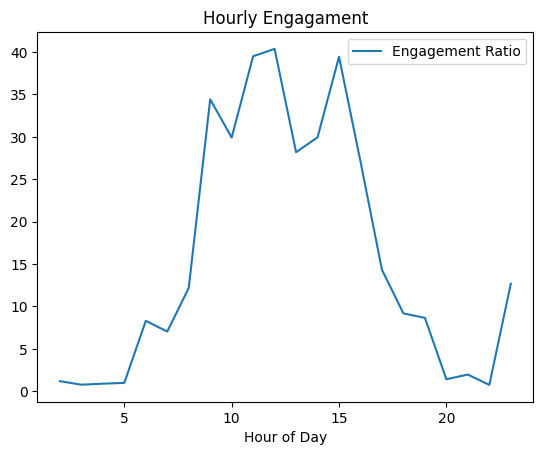

In [ ]:
#plot to visualize weekly distribution of engagement rates
hourly_engagement.plot.line(x='Hour of Day', y='Engagement Ratio', title= 'Hourly Engagament')
#plt.xticks(np.arange(0,24,1))

<Axes: xlabel='Hour of Day'>

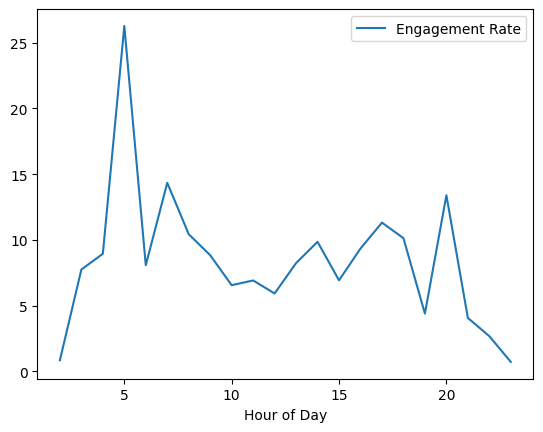

In [ ]:
hourly_engagement.plot.line(x='Hour of Day', y='Engagement Rate')

Engagement is seen to be maximum in the middle of the week and in the daytime.
It is maximum on Friday and between the hours 9 am to 5 pm

### Game Titles

In [ ]:
social_data['Account'] = social_data['Account'].str.strip()

In [ ]:
game_engagement = social_data.groupby(['Account'], as_index=False)[['Total Engagements','Total Impressions']].sum()
game_engagement['Count'] = social_data.groupby('Account')['Account'].count().reset_index(drop=True)
game_engagement['Engagement Rate'] = round((game_engagement['Total Engagements']/game_engagement['Total Impressions'])*100, 2)
game_engagement.sort_values(by='Engagement Rate', inplace=True)
game_engagement

,Account,Total Engagements,Total Impressions,Count,Engagement Rate
1,Content Creators,1387,45186,35,3.07
0,CSGO,92336,2313918,198,3.99
4,Valorant,931,22979,34,4.05
2,DOTA2,123990,1859326,698,6.67
3,General,3072568,33931451,1767,9.06


In [ ]:
#create a column for ratios to consider number of data points as well
engagement_ratio = game_engagement['Count'] / game_engagement['Engagement Rate'] 
game_engagement['Engagement Ratio'] = round(engagement_ratio,2)
game_engagement

,Account,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
1,Content Creators,1387,45186,35,3.07,11.40
0,CSGO,92336,2313918,198,3.99,49.62
4,Valorant,931,22979,34,4.05,8.40
2,DOTA2,123990,1859326,698,6.67,104.65
3,General,3072568,33931451,1767,9.06,195.03


In [ ]:
#Filter the game_engagement data based on game titles (Removing General and Content Creators)
game_engagement = game_engagement[game_engagement['Account'].isin(['CSGO', 'DOTA2', 'Valorant'])]
game_engagement

,Account,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
0,CSGO,92336,2313918,198,3.99,49.62
4,Valorant,931,22979,34,4.05,8.40
2,DOTA2,123990,1859326,698,6.67,104.65


<Axes: title={'center': 'Game wise Engagement Ratio'}, xlabel='Account'>

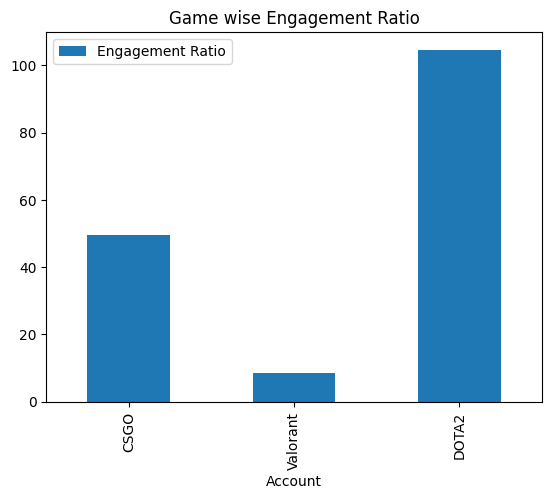

In [ ]:
game_engagement.plot.bar(x= 'Account', y ='Engagement Ratio', title='Game wise Engagement Ratio')

<Axes: title={'center': 'Game wise Engagement Rate'}, xlabel='Account'>

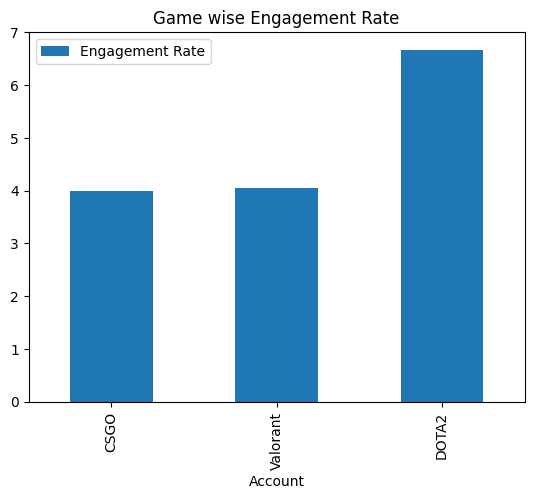

In [ ]:
game_engagement.plot.bar(x= 'Account', y ='Engagement Rate', title='Game wise Engagement Rate')

There are very less posts for the game Valorant, which has high engagement rate. So, the social media team should focus more on the game Valorant that might help gain traction. 

### Media Type

In [ ]:
media_engagement = social_data.groupby(['Media Type'], as_index=False)[['Total Engagements','Total Impressions']].sum()
media_engagement['Count'] = social_data.groupby(['Media Type'])['Media Type'].count().reset_index(drop=True)
media_engagement['Engagement Rate'] = round((media_engagement['Total Engagements']/media_engagement['Total Impressions'])*100, 2)
media_engagement.sort_values(by='Engagement Rate', inplace=True)
media_engagement

,Media Type,Total Engagements,Total Impressions,Count,Engagement Rate
2,Link,2257,232465,41,0.97
1,Carousel,6541,160689,9,4.07
3,Mixed,13664,184984,5,7.39
5,Text,246312,3106203,548,7.93
6,Video,859451,10594813,886,8.11
4,Photo,2162979,23893686,1242,9.05
0,Album,8,20,1,40.00


<Axes: xlabel='Media Type'>

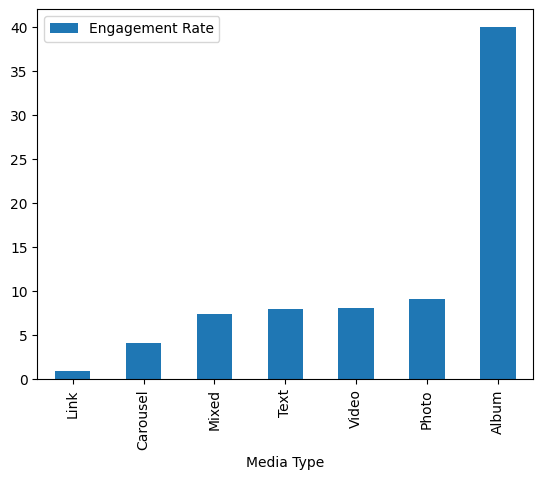

In [ ]:
media_engagement.plot.bar(x= 'Media Type', y ='Engagement Rate')

In [ ]:
#create a column for ratios to consider number of data points as well
engagement_ratio = media_engagement['Count'] / media_engagement['Engagement Rate'] 
media_engagement['Engagement Ratio'] = round(engagement_ratio,2)
media_engagement

,Media Type,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
2,Link,2257,232465,41,0.97,42.27
1,Carousel,6541,160689,9,4.07,2.21
3,Mixed,13664,184984,5,7.39,0.68
5,Text,246312,3106203,548,7.93,69.10
6,Video,859451,10594813,886,8.11,109.25
4,Photo,2162979,23893686,1242,9.05,137.24
0,Album,8,20,1,40.00,0.02


<Axes: title={'center': 'Media Type versus Engagement Rate'}, xlabel='Media Type'>

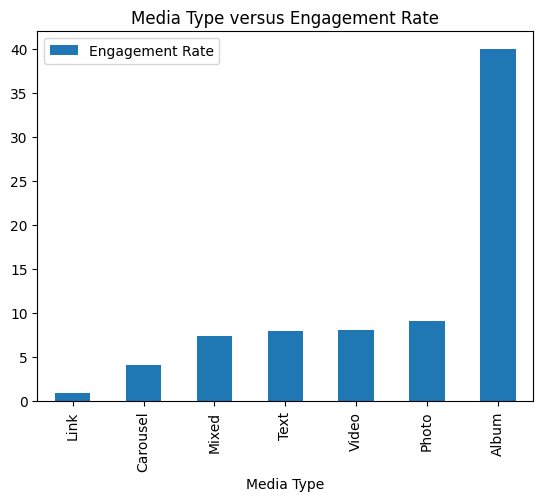

In [ ]:
media_engagement.plot.bar(x= 'Media Type', y ='Engagement Rate', title='Media Type versus Engagement Rate')

<Axes: title={'center': 'Media Type versus Engagement Ratio'}, xlabel='Media Type'>

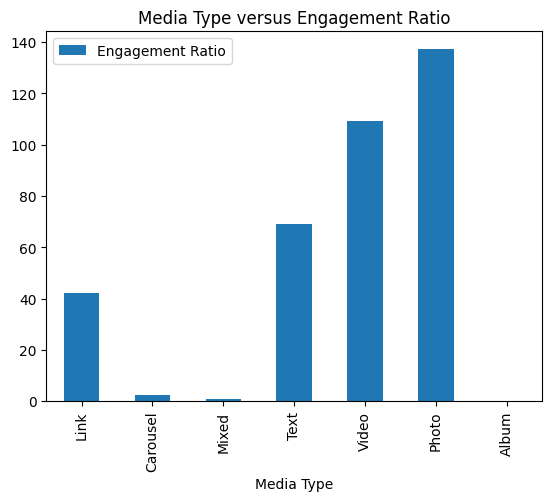

In [ ]:
media_engagement.plot.bar(x= 'Media Type', y ='Engagement Ratio', title='Media Type versus Engagement Ratio')

The above bar graph is misleading as it doesn't take into consideration the number of posts made of every media type. It is clear from the counts that the Link, Carousel, text, mixed and album has very few data points, so it can't give a good representation of the engagement rate. The media types that are used frequently and have better engagement are Text, Video and Photo. 


Therefore, if we compare betweeen these three media types, photos tend to have higher Engagement Rates indicating it performs best and is most used!


### Best Performing Campaign

In [ ]:
campaign_engagement = social_data.groupby(['Campaign Name'], as_index=False)[['Total Engagements','Total Impressions']].sum()
campaign_engagement['Count'] = social_data.groupby(['Campaign Name'])['Campaign Name'].count().reset_index(drop=True)
campaign_engagement['Engagement Rate'] = round((campaign_engagement['Total Engagements']/campaign_engagement['Total Impressions'])*100, 2)
campaign_engagement.sort_values(by='Engagement Rate', inplace=True)
campaign_engagement

,Campaign Name,Total Engagements,Total Impressions,Count,Engagement Rate
2,Evil Exhibited,185305,5742595,393,3.23
1,Evergreen,43127,1328729,161,3.25
0,Community Engagement,2044767,23803756,1379,8.59
3,N/A,1018013,7297780,799,13.95


In [ ]:
#Let us exclude Campaign Name as it represents Campaign Names that are not avaible.
# These might include different campaigns whose names are not avaialble, and so aggregating it doesn't make sense here
campaign_engagement = campaign_engagement.drop(3, axis=0)

In [ ]:
#create a column for ratios to consider number of data points as well
engagement_ratio = campaign_engagement['Count'] / campaign_engagement['Engagement Rate'] 
campaign_engagement['Engagement Ratio'] = round(engagement_ratio,2)
campaign_engagement

,Campaign Name,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
2,Evil Exhibited,185305,5742595,393,3.23,121.67
1,Evergreen,43127,1328729,161,3.25,49.54
0,Community Engagement,2044767,23803756,1379,8.59,160.54


The table clearly shows that Community Campaigns wins in terms of reach as well as Total Engagement Rate. 

### POSTING STRATEGY

1. Post more on weekdays and in the daytime.
2. The Valorant game needs more attention, so increase the number of posts for the Valorant game.
3. Photos, videos, and text tend to work best for engagement. However, there is not enough data for media types of Link, album, and carousal, so some posts can be dedicated to these media types to experiment.
4. Posts made under Community Campaign tend to attract more traction. So, it is advised to conduct more such campaigns. 

### Expanding Social Media Presence

In [ ]:
account_engagement = social_data.groupby(['Account Type','Account'], as_index=False)[['Total Engagements','Total Impressions']].sum()
account_engagement['Count'] = social_data.groupby(['Account Type','Account'])['Account'].count().reset_index(drop=True)
account_engagement['Engagement Rate'] = round((account_engagement['Total Engagements']/account_engagement['Total Impressions'])*100, 2)
account_engagement

,Account Type,Account,Total Engagements,Total Impressions,Count,Engagement Rate
0,FBPAGE,General,2572524,14472842,430,17.77
1,INSTAGRAM,General,84087,3574059,363,2.35
2,LINKEDIN_COMPANY,General,849,42801,22,1.98
3,TIKTOK_BUSINESS,General,18865,344159,112,5.48
4,TWITTER,CSGO,92336,2313918,198,3.99
5,TWITTER,DOTA2,119389,1790811,693,6.67
6,TWITTER,General,392834,15395867,764,2.55
7,YOUTUBE,Content Creators,1387,45186,35,3.07
8,YOUTUBE,DOTA2,4601,68515,5,6.72
9,YOUTUBE,General,3409,101723,76,3.35


In [ ]:
engagement_ratio = account_engagement['Count'] / account_engagement['Engagement Rate'] 
account_engagement['Engagement Ratio'] = round(engagement_ratio,2)
general_engagement = account_engagement[account_engagement['Account']=='General']
general_engagement

,Account Type,Account,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
0,FBPAGE,General,2572524,14472842,430,17.77,24.20
1,INSTAGRAM,General,84087,3574059,363,2.35,154.47
2,LINKEDIN_COMPANY,General,849,42801,22,1.98,11.11
3,TIKTOK_BUSINESS,General,18865,344159,112,5.48,20.44
6,TWITTER,General,392834,15395867,764,2.55,299.61
9,YOUTUBE,General,3409,101723,76,3.35,22.69


In [ ]:
game_engagement = account_engagement[account_engagement['Account'].isin(['CSGO', 'DOTA2', 'Valorant'])]
game_engagement

,Account Type,Account,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
4,TWITTER,CSGO,92336,2313918,198,3.99,49.62
5,TWITTER,DOTA2,119389,1790811,693,6.67,103.90
8,YOUTUBE,DOTA2,4601,68515,5,6.72,0.74
10,YOUTUBE,Valorant,931,22979,34,4.05,8.40


In [ ]:
creator_engagement = account_engagement[account_engagement['Account']=='Content Creators']
creator_engagement

,Account Type,Account,Total Engagements,Total Impressions,Count,Engagement Rate,Engagement Ratio
7,YOUTUBE,Content Creators,1387,45186,35,3.07,11.4


<Axes: title={'center': 'Account Type versus Engagement Ratio'}, xlabel='Account Type'>

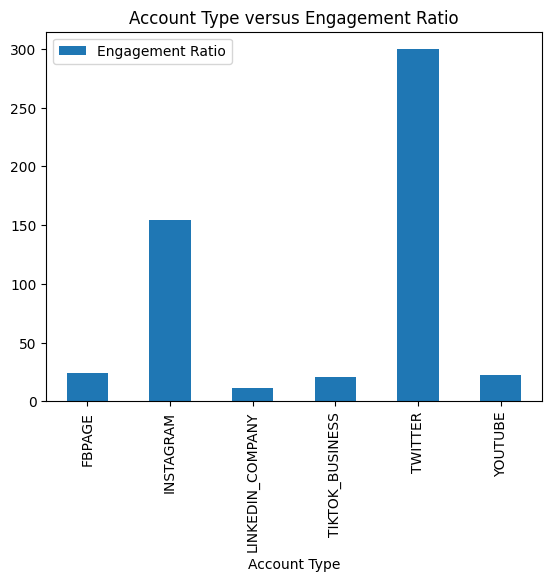

In [ ]:
general_engagement.plot.bar(x= 'Account Type', y ='Engagement Ratio', title='Account Type versus Engagement Ratio')

Insights-
1. For general accounts, twitter is working the best followed by Instagram in terms of Engagement. 
2. Valorant doesn't have a twitter account, so it would be good to expand Valorant on Twitter as a starter because it tends to work well in general and for other games too. 
3. CSGO and DOTA2 have a Twitter account already, so they can expand to Instagram platform as it depicts a good engagement for General Account.
4. Although, the FBPage Engagement Rate looks good (17.7%), it is actually misleading if we consider the post counts. Overall, it is not as good as other social media platforms. Therefore, it is better not the expand the social performance on FBPage and focus on other plotforms instead. 

Link for Insights: https://sites.google.com/view/data-analytics-assessment/home